# Personal Project [Python]
# Analyzing bank loans data for Credit Risk

Date : 13/05/2024

Author : Thatphong Phatthanachaiwat [Tew]


all question in this project is my curious.

# Import data and check missing values.

In [73]:
# import data
import pandas as pd
import numpy as np
df = pd.read_csv("/content/bankloans.csv")

In [74]:
# let's have a glance for the data
df.shape

(1150, 9)

In [75]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


In [77]:
df.isna().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [78]:
# "default" column have 450 rows of missing value?
# check it with own eyes
df[df.isna().any(axis=1)]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


# Delete missing values.

In [79]:
# dfc = dataframe_cleaned
dfc = df.dropna(subset=['default'])

In [80]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


# Data [Columns] meaning

Now wehave clean data in dataframe called 'dfc'
which have 700 rows and columns.

Then, What's the meaning in each columns.
from the description in kaggle (https://www.kaggle.com/datasets/atulmittal199174/credit-risk-analysis-for-extending-bank-loans/data)

1. age = age of customer.

 straightforward. more number, more age.

2. ed = education level.

 this dataset have 5 level of education (1 to 5), but it doesn't explain the meaning of it. well, I think 5 is the highest level of education because customer who have '5' education level is the lowest population among all customer [see code line below].

3. employ = Work experience.

 it's strange that this dataset use wording 'employ', at first i thought it kind like unemployment [True, False]. This numbers stand for years of working experience.

4. address = Address of the customer.

 it contains random numbers 0 - 34 which is no meaning. it should be 342/76 No.3 California ABC instead. Let's forget this columns.

5. income = Yearly Income of customer.

 I think it's reasonable to assume 13 - 446 as 13k - 446k '$' per year.

6. debtinc = Debt to Income ratio.

 It's Total debt / Income (so it's yearly). so the range is 0 (no debt) to infinity (depends). as example Risk analyst can identify NPL potential customer and look for who (loan officer) cause this.

7. creddebt = Credit to Debt ratio.

 It's Total debt / credit line. Loan officer can use this ratios for selling more credit cards (if customer have no problems with payment). As Risk Analyst, as long as it's staying low it's ok.

8. Othdebt = Other debt.

 it didn't show that other debt is seperate from the debt in "debt to income ratio" or not, so i test in the line below and it shows debt + other debt = debt use in debt to income ratio (due to none of other debt > debt in debt to income ratio).

9. default = Customer default in the past.

 1 = defaulted, 0 = never defaulted.

[Text(0, 0, '372'),
 Text(0, 0, '198'),
 Text(0, 0, '87'),
 Text(0, 0, '38'),
 Text(0, 0, '5')]

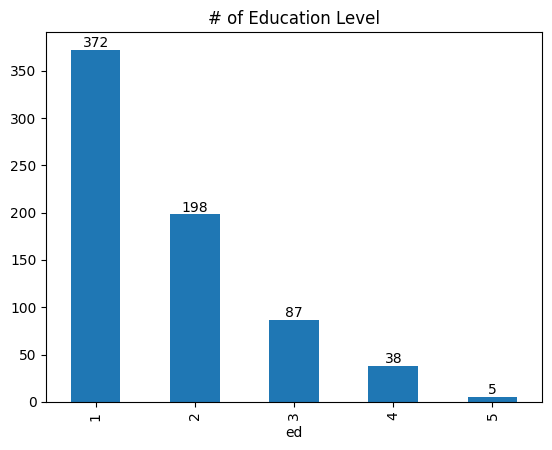

In [81]:
# check education level
dfc_ed_chart = dfc['ed'].value_counts().plot(kind = 'bar', title="# of Education Level")
# show number above bar plot. source : https://www.statology.org/pandas-annotate-bar-plot/
dfc_ed_chart.bar_label(dfc_ed_chart.containers[0])

In [82]:
# yearly customer debt (ydks) = debt to income ratio * income
# 1. all of [ydks - other debt] >= 0 ; then ydks = total debt
# 2. 1 of ydks - other debt < 0 ; then ydks != total debt

ydks = dfc['debtinc'] * dfc['income'] - dfc['othdebt']
ydks

0      1631.791392
1       532.299202
2       300.331075
3       347.178720
4       481.343436
          ...     
695     123.220062
696     239.454495
697     241.259264
698     642.634608
699     643.326684
Length: 700, dtype: float64

In [83]:
cusdebt =  ydks < 0
ydks[cusdebt]
# the result says none of yearly customer debt (ydks) - other debt < 0
# it's mean ydks > other's debt, so save to assume ydks = (debt + other debt) = total debt

Series([], dtype: float64)

# [1] Finding % of Default customer

In [84]:
dfc_defcount = dfc['default'].value_counts()
dfc_defcount

default
0.0    517
1.0    183
Name: count, dtype: int64

In [180]:
dfc_def = (dfc['default'].values == 1).sum()
dfc_undef = (dfc['default'].values == 0).sum()
def_ratio = dfc_def/dfc_undef
print("% of default customer is: " + str(def_ratio*100))

% of default customer is: 35.39651837524178


35% of asset is NPL is very high, compared to SCBX's NPL is 3.4% at the end of 2023

# [2] Aggregation


In [137]:
dfc[['age','ed', 'employ', 'income','debtinc','creddebt', 'othdebt']].agg(['max', 'min', 'mean', 'median', 'std'])

,age,ed,employ,income,debtinc,creddebt,othdebt
max,56.000000,5.000000,31.000000,446.000000,41.300000,20.561310,27.033600
min,20.000000,1.000000,0.000000,14.000000,0.400000,0.011696,0.045584
mean,34.860000,1.722857,8.388571,45.601429,10.260571,1.553553,3.058209
median,34.000000,1.000000,7.000000,34.000000,8.600000,0.854869,1.987567
std,7.997342,0.928206,6.658039,36.814226,6.827234,2.117197,3.287555


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'ed'}>,
        <Axes: title={'center': 'employ'}>],
       [<Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'debtinc'}>],
       [<Axes: title={'center': 'creddebt'}>,
        <Axes: title={'center': 'othdebt'}>,
        <Axes: title={'center': 'default'}>]], dtype=object)

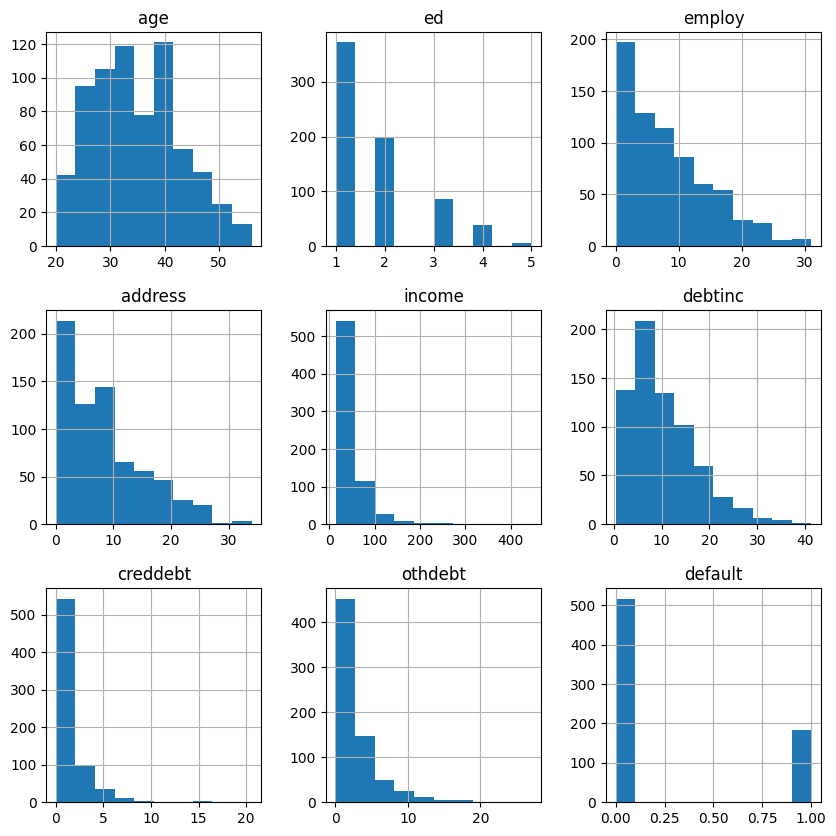

In [117]:
# histogram
dfc.hist(figsize=(10,10))

# [3] Which education level has most credit to debt ratio??

In [182]:
df3 = dfc[['ed', 'debtinc']]
df3.groupby('ed').median() # use median for right skew

,debtinc
ed,
1,8.85
2,8.40
3,9.30
4,9.90
5,7.80


# [4] Which age range have most income?

In [149]:
df4 = dfc[['age', 'employ', 'income']]
df4.groupby(pd.cut(df4['age'], [20, 30, 40, 50, 60])).median() # use median for right skew

,age,employ,income
age,,,
"(20, 30]",27.0,3.5,24.0
"(30, 40]",35.0,9.0,39.0
"(40, 50]",44.0,12.5,55.5
"(50, 60]",52.5,14.5,73.0


# [5] Top 10 customer who have most debt to income ratio.

In [178]:
df5 = dfc.sort_values(by=['debtinc'], ascending=False).head(10)
df5

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
373,33,1,14,8,72,41.3,15.016680,14.719320,1.0
583,37,3,16,14,50,36.6,7.320000,10.980000,1.0
122,34,4,6,3,27,35.3,1.982448,7.548552,1.0
584,25,4,0,1,18,33.4,2.801592,3.210408,1.0
492,28,1,0,2,28,33.3,2.284380,7.039620,1.0
654,36,1,11,2,33,32.5,1.265550,9.459450,0.0
381,48,1,13,20,50,30.8,6.113800,9.286200,1.0
637,31,1,7,11,41,30.7,2.995706,9.591294,1.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
419,47,1,19,7,50,30.1,3.175550,11.874450,0.0


#[6] Deal with Imbalanced Data

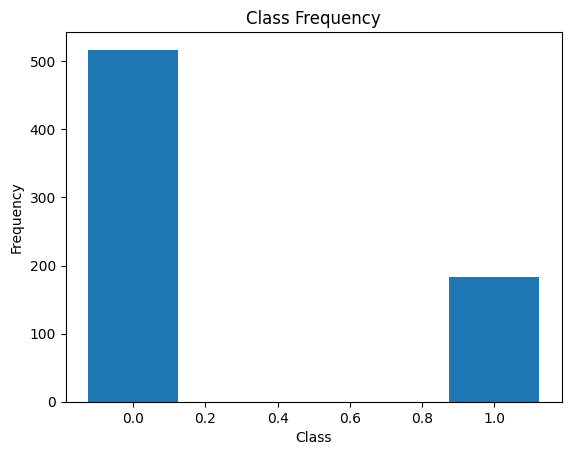

In [89]:
# the default [1] & undefault [2] is imbalanced.
import matplotlib.pyplot as plt

classes = dfc['default'].values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts,width=0.25)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [90]:
# fix imbalanced data using SMOT.

xsmot = dfc.drop(["default"],axis=1)  # x = every variables except defaults
ysmot = dfc['default']                # y = default column

from imblearn.over_sampling import SMOTE    # SMOTE (Synthetic Minority Oversampling Technique) for fix unbalanced data

smote=SMOTE(sampling_strategy='minority')
xsmot,ysmot = smote.fit_resample(xsmot,ysmot)
ysmot = ysmot.to_frame()     # change y from series to df.
ysmot.value_counts()

default
0.0        517
1.0        517
Name: count, dtype: int64

In [91]:
dfcSMOT = xsmot.join(ysmot, how = 'left',) # join xsmot and y smot to 1 dataframe.
dfcSMOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1034 non-null   int64  
 1   ed        1034 non-null   int64  
 2   employ    1034 non-null   int64  
 3   address   1034 non-null   int64  
 4   income    1034 non-null   int64  
 5   debtinc   1034 non-null   float64
 6   creddebt  1034 non-null   float64
 7   othdebt   1034 non-null   float64
 8   default   1034 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 72.8 KB


#[7] Logistic Regression

In [92]:
## select feature
#split dataset in features and target variable
feature_cols = ['age', 'ed', 'employ', 'income','debtinc','creddebt']   # address isn't neccessary, other debt already in debtinc.
x = dfcSMOT[feature_cols]
y = dfcSMOT.default   # result is 0 = undefault, 1 = default.

In [93]:
## Splitting data
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [94]:
## Model Development & Prediction
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [95]:
## Confusion Matrix
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[98, 34],
       [40, 87]])

Text(0.5, 427.9555555555555, 'Predicted result')

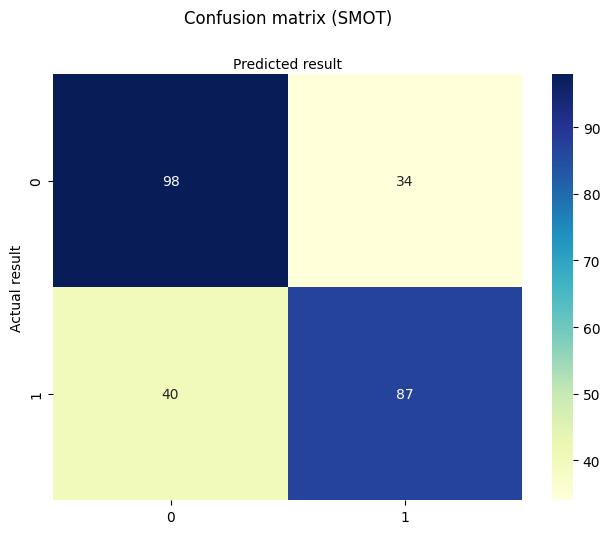

In [96]:
## create confusion matrix heat map
# import required modules
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]             # the result of default always 0,1
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (SMOT)', y=1.1)
plt.ylabel('Actual result')
plt.xlabel('Predicted result')

In [97]:
# find precision, recall, f1-score, support.
from sklearn.metrics import classification_report
target_names = ['undefault[0]', 'default[1]']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

undefault[0]       0.71      0.74      0.73       132
  default[1]       0.72      0.69      0.70       127

    accuracy                           0.71       259
   macro avg       0.71      0.71      0.71       259
weighted avg       0.71      0.71      0.71       259



N of test = 259 (roundup(1034*0.25))

---
This model is good for predict default customer. with 74% recall (also 73%-75% for precision & accuracy).




In [98]:
# check weight
print('age', 'ed', 'employ', 'income','debtinc','creddebt')
print(logreg.coef_[0])

age ed employ income debtinc creddebt
[ 0.00090685 -0.19877433 -0.32980487  0.00170431  0.10233151  0.65540487]
